In [221]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicating the expected vote share in each district is shown in the "dist_polls" table below. These values are a composite of several polls that the experts have combined and weighted. The "Purple" values show the expected vote share of the Purple party, along with the variance of that expectation and the number of polls that were combined to get that result.  

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

<b>Note:</b> the errors and confidence intervals are not totally trivial. As part of the written answer, offer an evaluation of your confidence in the prediction, and why you think that. This is not a question with one specific error, your estimation will have some expected errors, somewhere. You may not have the tools to calculate it all the way through, that's fine. 

### Question 1 - Your Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
<li> <b> What do you think about the error/accuracy:</b>
</ul>

##### Setup Poll Data

The dataframe "dist_polls" contains all of the polls for each seat. Each value is expressed as expected vote share (as a ratio) for the <b>Purple</b> party. The Yellow party can be safely assumed to get the rest of the votes. 

In [222]:
# Please don't edit this part. 
# Setup polling data. 
districts = [1,2,3,4,5,6,7]
dist_polls = pd.DataFrame(districts, columns={"district"})

dist_polls["Poll_1"] = [.55, .49, .51, .6, .41, .46, .54]
dist_polls["Poll_2"] = [.53, .51, .51, .62, .44, .48, .53]
dist_polls["Poll_3"] = [.51, .49, .53, .61, .42, .46, .52]
dist_polls["Poll_4"] = [.47, .48, .51, .54, .45, .45, .51]
dist_polls["Poll_5"] = [.61, .52, .49, .73, .44, .51, .53]
dist_polls["Poll_6"] = [.54, .45, .51, .61, .47, .52, .52]
dist_polls["Poll_7"] = [.55, .47, .5, .56, .47, .46, .56]
dist_polls["Poll_8"] = [.53, .49, .51, .55, .43, .49, .55]
dist_polls["Poll_9"] = [.57, .39, .52, .57, .53, .43, .53]

dist_polls


,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,1,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,2,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,3,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,4,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,5,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,6,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,7,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


In [223]:
dff=dist_polls.drop(["district"],axis=1)
dff


,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


In [224]:
# vote share of purple party in all nine polls in  district 1
df1=dff.iloc[0]
print("Purple pary vote share in 9 polls in district 1:",df1.mean())



Purple pary vote share in 9 polls in district 1: 0.54


In [225]:
df2=dff.iloc[1]
print("Purple pary vote share in 9 polls in district 2  :",round(df2.mean(),2))

Purple pary vote share in 9 polls in district 2  : 0.48


In [226]:
df3=dff.iloc[2]
print("Purple pary vote share in 9 polls in district 3  :",df3.mean())

Purple pary vote share in 9 polls in district 3  : 0.51


In [227]:
df4=dff.iloc[3]
print("Purple pary vote share in 9 polls in district 4  :",round(df4.mean(),2))

Purple pary vote share in 9 polls in district 4  : 0.6


In [228]:
df5=dff.iloc[4]
print("Purple pary vote share in 9 polls in district 5  :",round(df5.mean(),2))

Purple pary vote share in 9 polls in district 5  : 0.45


In [229]:
df6=dff.iloc[5]
print("Purple pary vote share in 9 polls in district 6  :",round(df6.mean(),2))

Purple pary vote share in 9 polls in district 6  : 0.47


In [230]:
df7=dff.iloc[6]
print("Purple pary vote share in 9 polls in district 7 :",round(df7.mean(),2))

Purple pary vote share in 9 polls in district 7 : 0.53


##### Setup Turnout Data

The dataframe "past_vte_table" shows the voter turnout, along with the impact on the votes counted for the <b>Yellow party</b>, all expressed as percentages. For example, if in one row the turnout is .45 and the Yellow_improvement is -.04, that means that 45% of the populace turned out to vote, and the Yellow party got 4% fewer votes than polling indicated. 

In [231]:
# Please don't edit this part. 
# Setup vote data. 
voter_turnout_history = [.53, .51, .48, .55, .54, .59, .49, .57, .56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [.012, .023, -.017, .031, .030, -.004, -.03, .042, .029]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table.head(9)

,voter_turn_percentage,Yellow_improvement,year
0,0.53,0.012,2013
1,0.51,0.023,2014
2,0.48,-0.017,2015
3,0.55,0.031,2016
4,0.54,0.030,2017
5,0.59,-0.004,2018
6,0.49,-0.030,2019
7,0.57,0.042,2020
8,0.56,0.029,2021


## Start Your Work

### Part 1 - Election

Calculation of Percentage share in each district in done above:

In [232]:
# Do some stuff

In [233]:
#c_obj=thinkstats2.Cdf(dist_polls)
#thinkplot.cdf(c_obj)

<AxesSubplot:xlabel='Poll_1', ylabel='Count'>

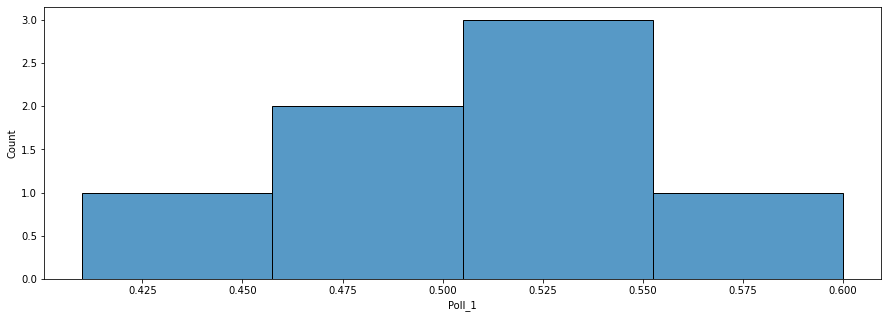

In [234]:

sns.histplot(data=dist_polls, x="Poll_1")

                                DISTRICT-1

In [235]:
df1=dff.iloc[0]
print("Purple pary vote share in all 9 polls in district 1:",df1.mean())

Purple pary vote share in all 9 polls in district 1: 0.54


In [236]:
#How likely is it for someone to vote purple and yellow?
probp = .54
print("Purple Prob:", probp)

proby = .46
print("Yellow Prob :", proby)

Purple Prob: 0.54
Yellow Prob : 0.46


In [237]:
def oneVote(probCalc):
    vote = np.random.binomial(n=1, p=probCalc)
    return vote

In [238]:
oneVote(probp)

0

In [239]:
#Get an arbitrary number of simulated votes
def getSample(voteProb, n=1000):
    vote_list = []
    for i in range(n):
        vote_list.append(oneVote(voteProb))
    return vote_list

In [240]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp = getSample(probp, 5000)
np.mean(tmp)

0.5354

In [241]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci

In [242]:
getSamples(probp, 1000, 5)

([0.546, 0.518, 0.564, 0.568, 0.558],
 0.020995237555217098,
 Cdf([0.518 0.546 0.558 0.564 0.568], [0.2 0.4 0.6 0.8 1. ]),
 (0.518, 0.568))

Error: 0.14859340496805368
Error: 0.044799553569204224
Error: 0.015582040944625966
Error: 0.004566114321827698
Error: 0.0017163560236734055


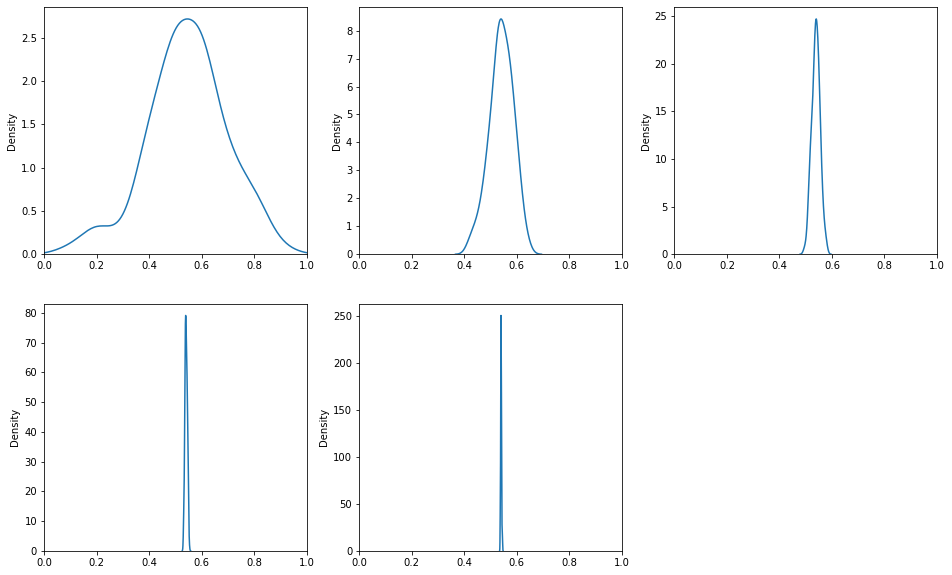

In [243]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probp, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH).set(xlim=(0,1))
    print("Error:", err)
thinkplot.Config()


Error: 0.15019986684414868
Error: 0.05628498911788114
Error: 0.016334013591276328
Error: 0.005659955830216344
Error: 0.0014906481811614732


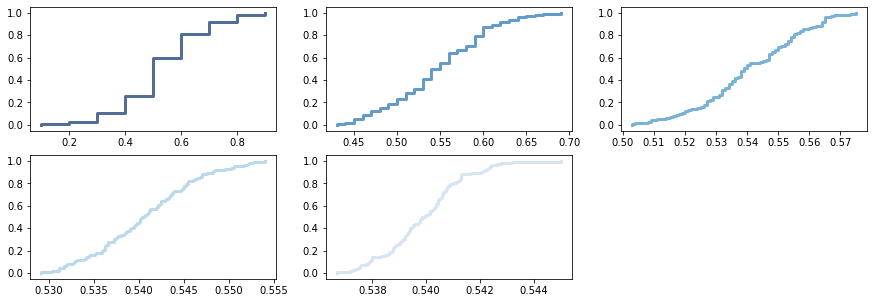

In [244]:
#And the CDFs
from matplotlib.pyplot import xlim


for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probp, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err)
thinkplot.Config()

0.972


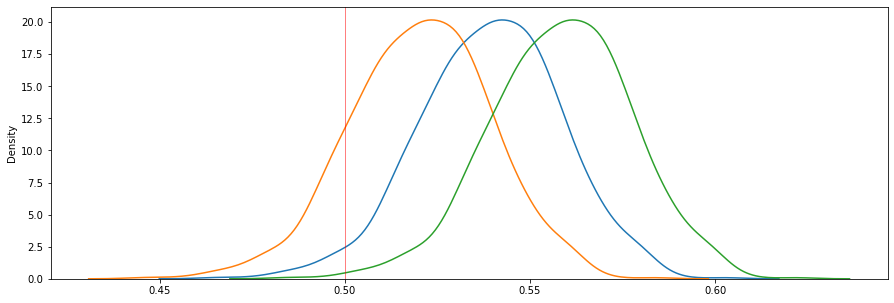

In [245]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means, err, cdfFin, ciFin = getSamples(probp, n=700, samples=trials)
lowest = means - err
highest = means + err
bWins = 0 
for i in range(len(means)):
    if means[i] > .5000:
        bWins = bWins + 1
print(bWins/trials)

sns.kdeplot(means)
sns.kdeplot(lowest)
sns.kdeplot(highest)
thinkplot.axvline(.5, color="red")

Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for purple = 54%.

Fraction of Scenarios where purple wins is 97.2% 
We are 95 percent confident that purple will get between 50.0% and 57.7% percent of the vote


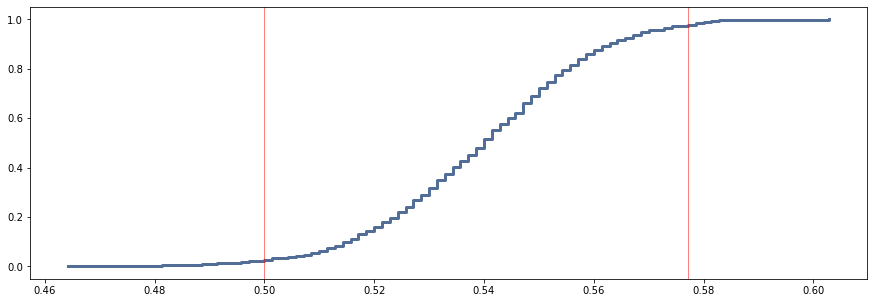

In [246]:
thinkplot.Cdf(cdfFin)
thinkplot.axvline(ciFin[0], color="red")
thinkplot.axvline(ciFin[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin[0]*100, ciFin[1]*100))

Prediction-  District1-Winner-Purple Party

                                DISTRICT-2

In [247]:
df2=dff.iloc[1]
print("Purple pary vote share in 9 polls in district 2  :",round(df2.mean(),2))

Purple pary vote share in 9 polls in district 2  : 0.48


In [248]:
#How likely is it for someone to vote purple and yellow?
probp2 = .48
print("Purple Prob:", probp2)

proby2 = .52
print("Yellow Prob :", proby2)

Purple Prob: 0.48
Yellow Prob : 0.52


In [249]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp3 = getSample(probp2, 5000)
np.mean(tmp3)

0.4806

In [250]:
getSamples(probp2, 1000, 5)

([0.468, 0.47, 0.474, 0.466, 0.47],
 0.010733126291998973,
 Cdf([0.466 0.468 0.47  0.474], [0.2 0.4 0.8 1. ]),
 (0.466, 0.474))

Error: 0.15639693091617882
Error: 0.05349766350038102
Error: 0.015638094513079268
Error: 0.005008203270635084
Error: 0.0016341303497579354


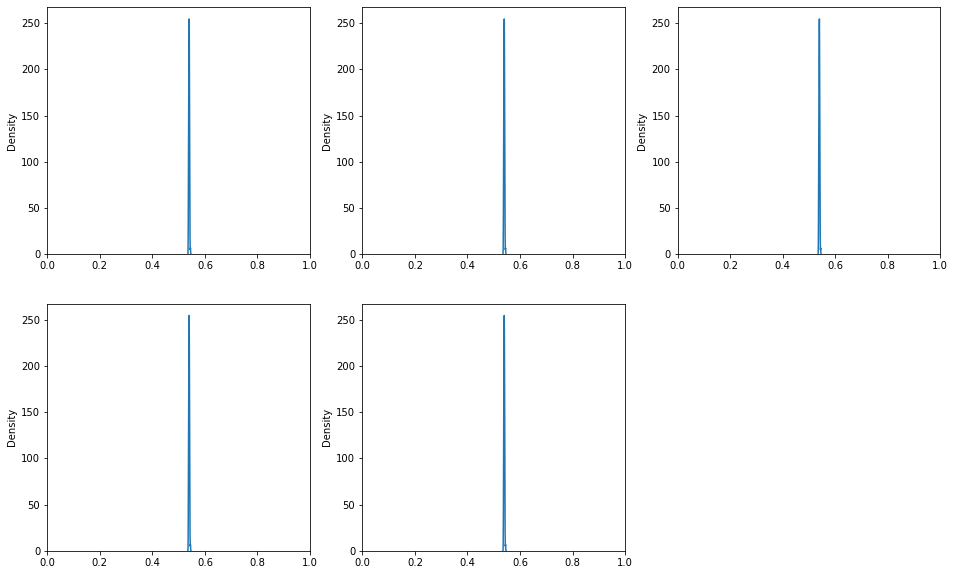

In [251]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH2, err2, cdf2, ci2 = getSamples(probp2, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH).set(xlim=(0,1))
    print("Error:", err2)
thinkplot.Config()


Error: 0.14601369798755187
Error: 0.054405882034941774
Error: 0.015441178711484429
Error: 0.004451224550615259
Error: 0.0014578154890108718


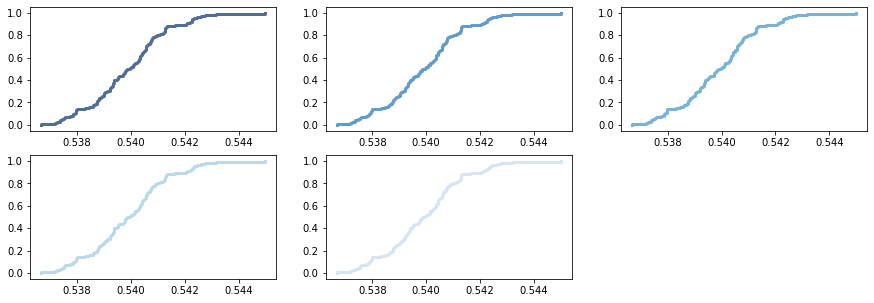

In [252]:
for i in range(countHist):
    tmpH2, err2, cdf2, ci2 = getSamples(probp2, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err2)
thinkplot.Config()


0.118


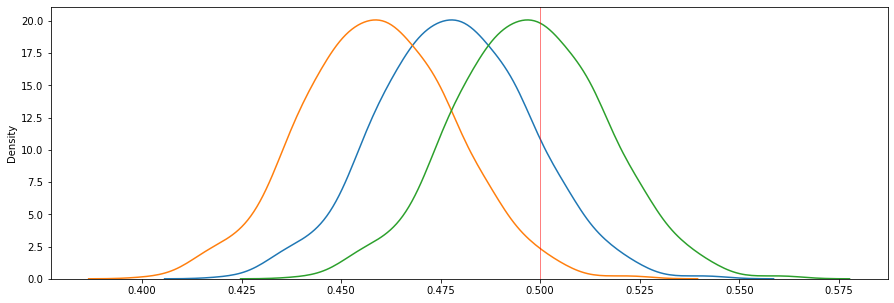

In [253]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means2, err2, cdfFin2, ciFin2 = getSamples(probp2, n=700, samples=trials)
lowest2 = means2 - err2
highest2 = means2 + err2
bWins2 = 0 
for i in range(len(means2)):
    if means2[i] > .5000:
        bWins2 = bWins2 + 1
print(bWins2/trials)

sns.kdeplot(means2)
sns.kdeplot(lowest2)
sns.kdeplot(highest2)
thinkplot.axvline(.5, color="red")


Predicting the winner is with all 9 polls combined in District 2

Fraction of Scenarios where purple wins is 11.8% 
We are 95 percent confident that purple will get between 44.0% and 51.6% percent of the vote


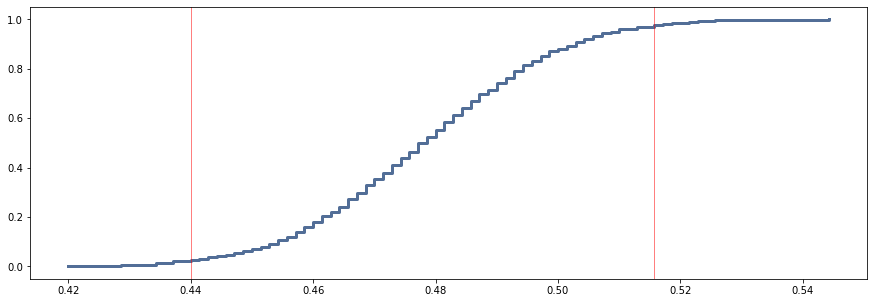

In [254]:
thinkplot.Cdf(cdfFin2)
thinkplot.axvline(ciFin2[0], color="red")
thinkplot.axvline(ciFin2[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin2.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin2[0]*100, ciFin2[1]*100))


Prediction- Purple party is loosing in District 2  
            Yellow party is winner is district 2    

                            DISTRICT-3

In [255]:
df3=dff.iloc[2]
print("Purple pary vote share in 9 polls in district 3  :",df3.mean())

Purple pary vote share in 9 polls in district 3  : 0.51


In [256]:
#How likely is it for someone to vote purple and yellow?
probp3 = .51
print("Purple Prob:", probp3)

proby3 = .49
print("Yellow Prob :", proby3)


Purple Prob: 0.51
Yellow Prob : 0.49


In [257]:
#proability of 1 vote going to purple party
oneVote(probp3)

0

In [258]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp2 = getSample(probp3, 6500)
np.mean(tmp2)


0.5206153846153846

In [259]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci


In [260]:
getSamples(probp3, 1100, 5)

([0.5290909090909091,
  0.5163636363636364,
  0.5172727272727272,
  0.5009090909090909,
  0.5172727272727272],
 0.010893928857414697,
 Cdf([0.50090909 0.51636364 0.51727273 0.52909091], [0.2 0.4 0.8 1. ]),
 (0.5009090909090909, 0.5290909090909091))

Sample Size Check

Error: 0.16253111590204394
Error: 0.04863874250766845
Error: 0.015426924515275246
Error: 0.00492183446953009


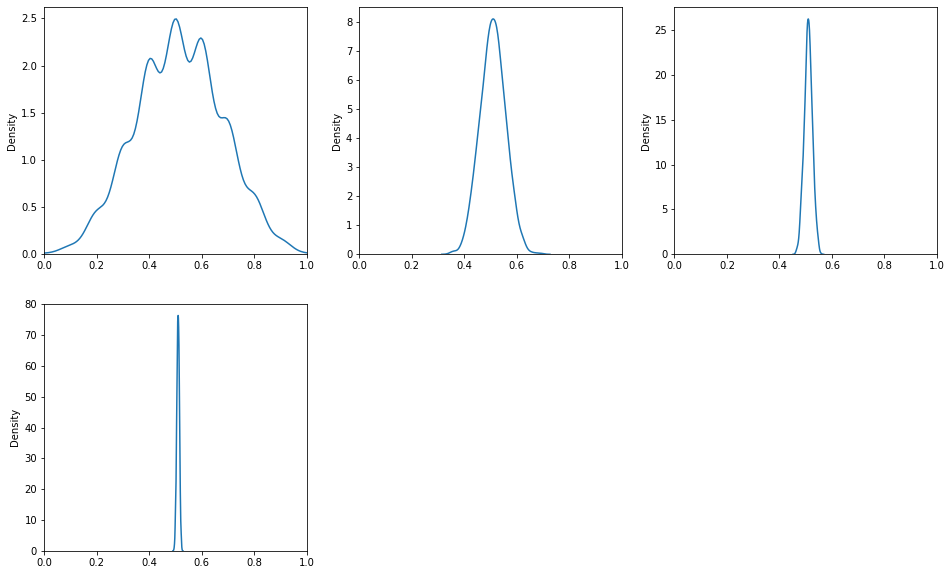

In [261]:
#Print a grid of differnet n values

countHist = 4
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 1100

for i in range(countHist):
    tmpH3, err3, cdf3, ci3 = getSamples(probp3, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH3).set(xlim=(0,1))
    print("Error:", err3)
thinkplot.Config()


All of these graphs have a fixed x-axis, the "tigher" the projections (probability of a purple party win) are, the more confident we are in that prediction. Or, the more likely "that thing" is to happen, and the less likely some "far away thing" is to happen. 

Error: 0.1572895419282541
Error: 0.04922120755047841
Error: 0.015856917045309237
Error: 0.00496052050054867


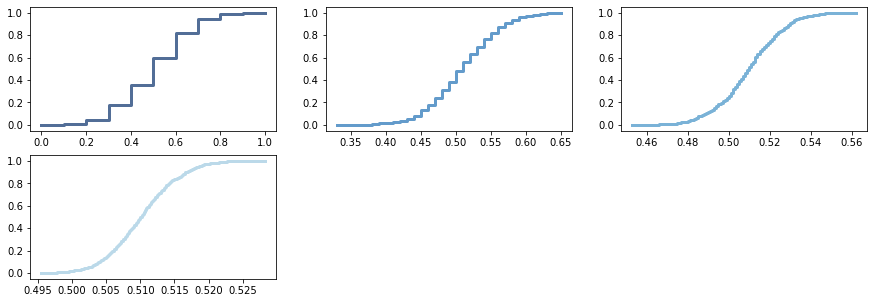

In [262]:
#plotting CDF's:
for i in range(countHist):
    tmpH3, err3, cdf3, ci3 = getSamples(probp3, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf3)
    print("Error:", err3)
thinkplot.Config()


Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for purple party = 51.4%. 

0.6481818181818182


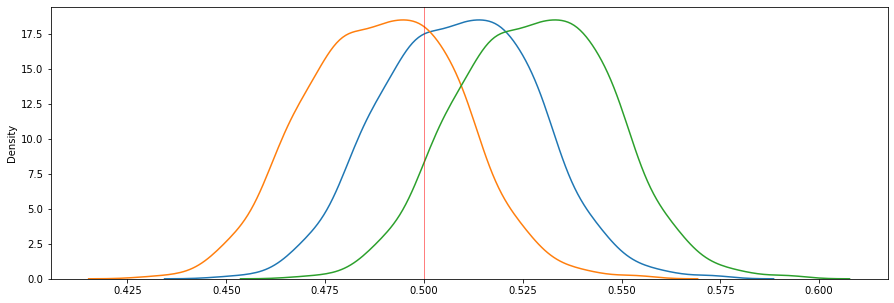

In [263]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1100
means3, err3, cdfFin3, ciFin3 = getSamples(probp3, n=700, samples=trials)
lowest3 = means3 - err3
highest3 = means3 + err3
bWins3 = 0 
for i in range(len(means3)):
    if means3[i] > .5000:
        bWins3 = bWins3 + 1
print(bWins3/trials)

sns.kdeplot(means3)
sns.kdeplot(lowest3)
sns.kdeplot(highest3)
thinkplot.axvline(.5, color="red")


Predict The winner in all 9 polls in for District 2

Fraction of Scenarios where purple wins is 64.8% 
We are 95 percent confident that purple will get between 47.3% and 54.4% percent of the vote


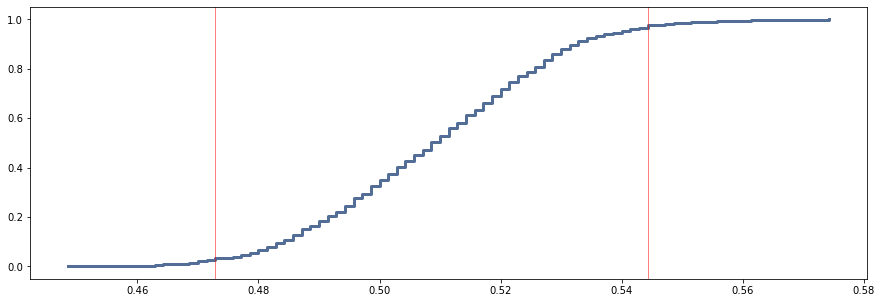

In [264]:
thinkplot.Cdf(cdfFin3)
thinkplot.axvline(ciFin3[0], color="red")
thinkplot.axvline(ciFin3[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin3.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin3[0]*100, ciFin3[1]*100))


Prediction-  District 3 -Winner-Purple Party

                                    DISTRICT-4

In [265]:
df4=dff.iloc[3]
print("Purple pary vote share in 9 polls in district 4  :",round(df4.mean(),2))

Purple pary vote share in 9 polls in district 4  : 0.6


In [266]:
#How likely is it for someone to vote purple and yellow?
probp4 = .60
print("Purple Prob:", probp4)

proby4 = .40
print("Yellow Prob :", proby4)


Purple Prob: 0.6
Yellow Prob : 0.4


In [267]:
oneVote(probp4)

1

In [268]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp4 = getSample(probp4, 1000)
np.mean(tmp4)


0.582

In [269]:
getSamples(probp4, 1000, 5)

([0.595, 0.606, 0.589, 0.59, 0.607],
 0.008136338242723204,
 Cdf([0.589 0.59  0.595 0.606 0.607], [0.2 0.4 0.6 0.8 1. ]),
 (0.589, 0.607))

Error: 0.1584297951775486
Error: 0.04125530268947254
Error: 0.015605447766725579
Error: 0.005410443604733349
Error: 0.0015717073518947478


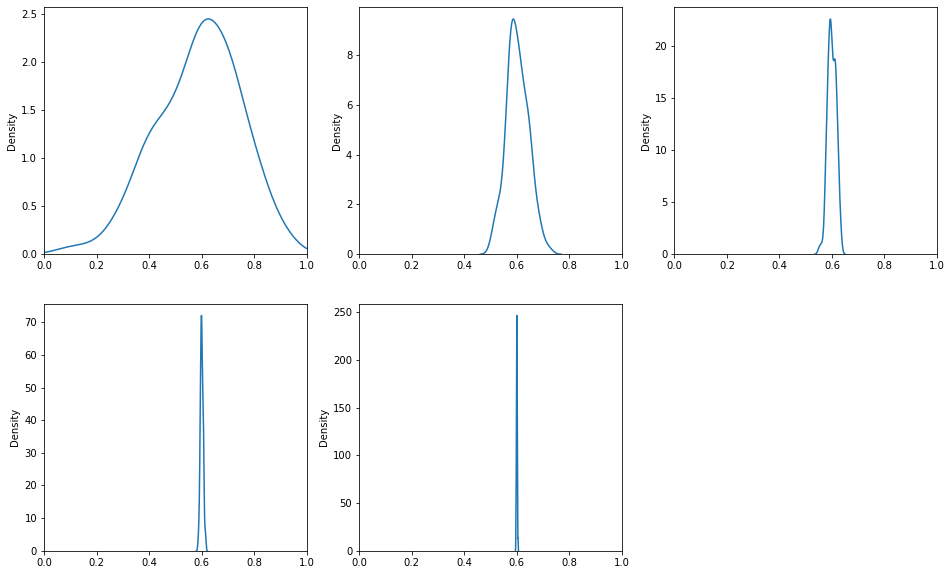

In [270]:
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH4, err4, cdf4, ci4 = getSamples(probp4, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH4).set(xlim=(0,1))
    print("Error:", err4)
thinkplot.Config()


Error: 0.019064016751300802
Error: 0.019064016751300802
Error: 0.019064016751300802
Error: 0.019064016751300802
Error: 0.019064016751300802


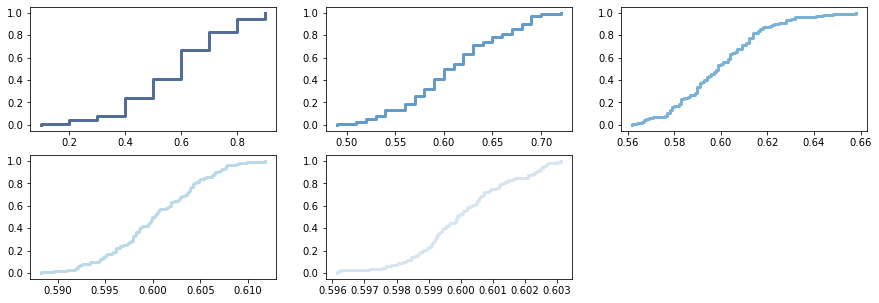

In [271]:
for i in range(countHist):
    tmpH4, err4, cdf4, ci4 = getSamples(probp4, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf4)
    print("Error:", err)
thinkplot.Config()


1.0


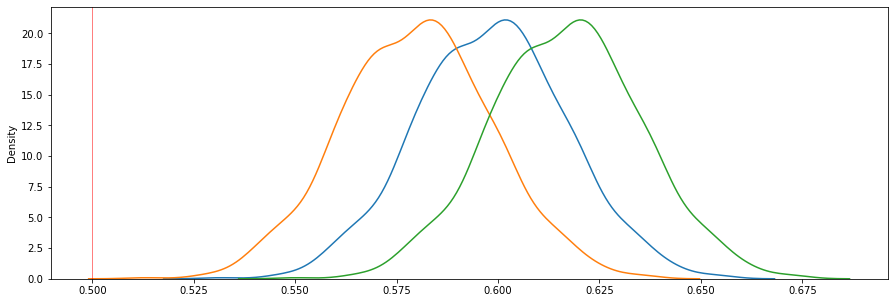

In [272]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means4, err4, cdfFin4, ciFin4 = getSamples(probp4, n=700, samples=trials)
lowest4 = means4 - err4
highest4 = means4 + err4
bWins4 = 0 
for i in range(len(means4)):
    if means4[i] > .5000:
        bWins4 = bWins4 + 1
print(bWins4/trials)

sns.kdeplot(means4)
sns.kdeplot(lowest4)
sns.kdeplot(highest4)
thinkplot.axvline(.5, color="red")


Fraction of Scenarios where purple wins is 100.0% 
We are 95 percent confident that purple will get between 56.1% and 63.4% percent of the vote


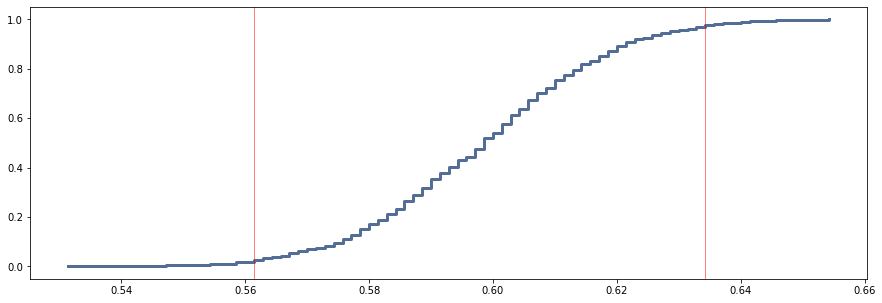

In [273]:
thinkplot.Cdf(cdfFin4)
thinkplot.axvline(ciFin4[0], color="red")
thinkplot.axvline(ciFin4[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin4.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin4[0]*100, ciFin4[1]*100))


Prediction - Combining all the 9 polls in district4 - winner is purple party

                                District-5

In [274]:
df5=dff.iloc[4]
print("Purple pary vote share in 9 polls in district 5  :",round(df5.mean(),2))

Purple pary vote share in 9 polls in district 5  : 0.45


In [275]:
#How likely is it for someone to vote purple and yellow?
probp5 = .45
print("Purple Prob:", probp5)

proby5 = .55
print("Yellow Prob :", proby5)

Purple Prob: 0.45
Yellow Prob : 0.55


In [276]:
oneVote(probp5)

0

In [277]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp5 = getSample(probp5, 1000)
np.mean(tmp5)

0.451

In [278]:
getSamples(probp5, 1000, 5)

([0.47, 0.441, 0.437, 0.471, 0.441],
 0.015310127367203693,
 Cdf([0.437 0.441 0.47  0.471], [0.2 0.6 0.8 1. ]),
 (0.437, 0.471))

Error: 0.13820274961085252
Error: 0.04692547282660027
Error: 0.01483408237809134
Error: 0.00501266396240562
Error: 0.0016625534577871459


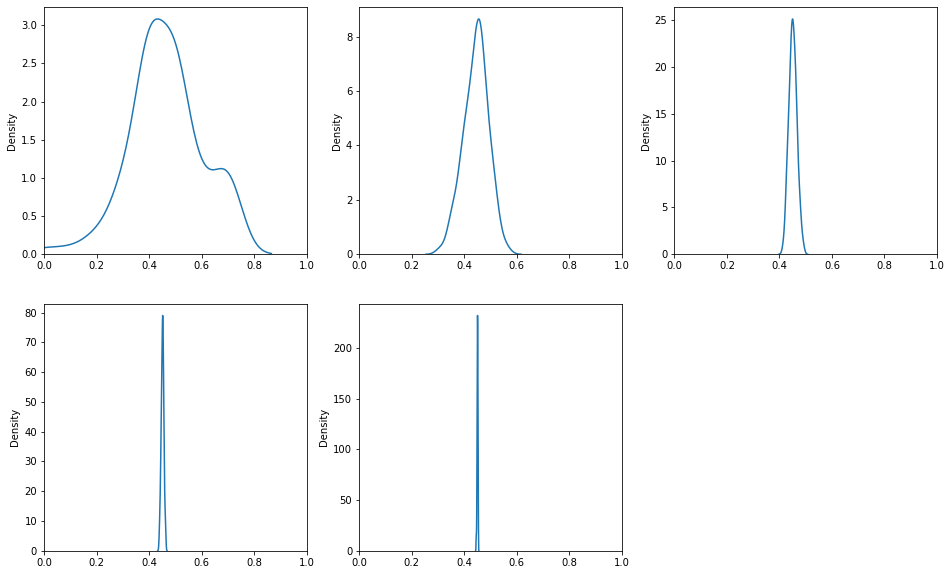

In [279]:
#plotting KDF's
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH5, err5, cdf5, ci5 = getSamples(probp5, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH5).set(xlim=(0,1))
    print("Error:", err5)
thinkplot.Config()

Error: 0.1532970971675589
Error: 0.05085272854036448
Error: 0.016124825580452026
Error: 0.0050583297638647495
Error: 0.001307016067231002


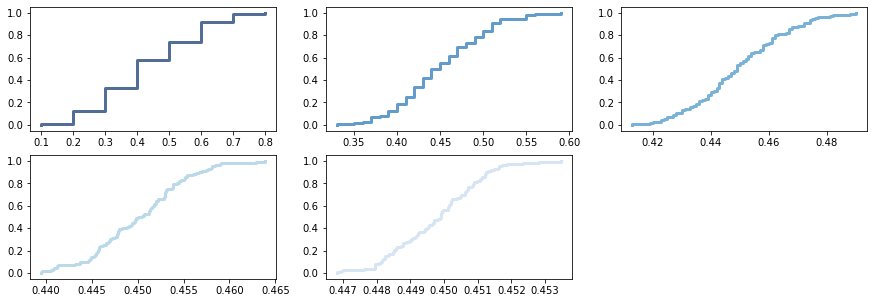

In [280]:
#plotting CDF's
for i in range(countHist):
    tmpH5, err5, cdf5, ci5 = getSamples(probp5, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf5)
    print("Error:", err5)
thinkplot.Config()

0.008


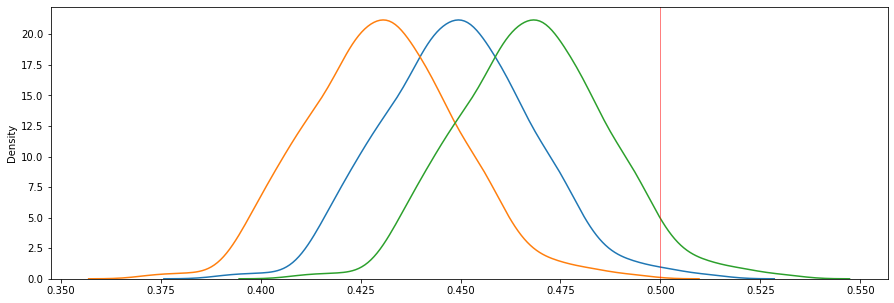

In [281]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means5, err5, cdfFin5, ciFin5 = getSamples(probp5, n=700, samples=trials)
lowest5 = means5 - err5
highest5 = means5 + err5
bWins5 = 0 
for i in range(len(means5)):
    if means5[i] > .5000:
        bWins5 = bWins5 + 1
print(bWins5/trials)

sns.kdeplot(means5)
sns.kdeplot(lowest5)
sns.kdeplot(highest5)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple wins is 0.8% 
We are 95 percent confident that purple will get between 41.6% and 48.7% percent of the vote


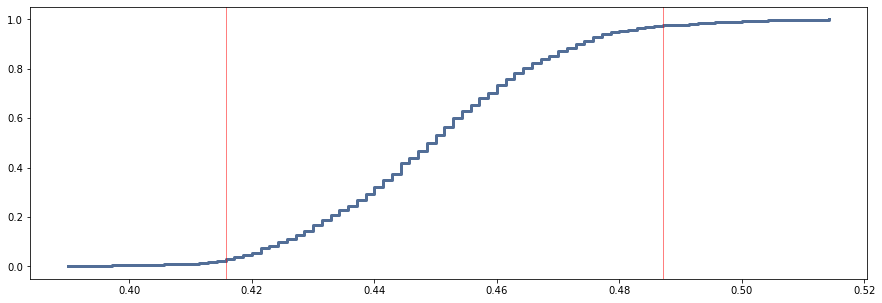

In [282]:
thinkplot.Cdf(cdfFin5)
thinkplot.axvline(ciFin5[0], color="red")
thinkplot.axvline(ciFin5[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin5.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin5[0]*100, ciFin5[1]*100))

Prediction- Combining all 9 polls in district 5 purple party looses.
            Winner is yellow party

                            District-6

In [283]:
df6=dff.iloc[5]
print("Purple pary vote share in 9 polls in district 6 :",round(df6.mean(),2))

Purple pary vote share in 9 polls in district 6 : 0.47


In [284]:
#How likely is it for someone to vote purple and yellow?
probp6 = .47
print("Purple Prob:", probp6)

proby6 = .53
print("Yellow Prob :", proby6)

Purple Prob: 0.47
Yellow Prob : 0.53


In [285]:
oneVote(probp6)

0

In [286]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp6 = getSample(probp5, 1000)
np.mean(tmp6)

0.459

In [287]:
getSamples(probp6, 1000, 5)

([0.47, 0.473, 0.457, 0.478, 0.458],
 0.008786353054595495,
 Cdf([0.457 0.458 0.47  0.473 0.478], [0.2 0.4 0.6 0.8 1. ]),
 (0.457, 0.478))

Error: 0.17128922908344238
Error: 0.05418486873657627
Error: 0.015189470036838008
Error: 0.004626932028893446
Error: 0.0015469243678990895


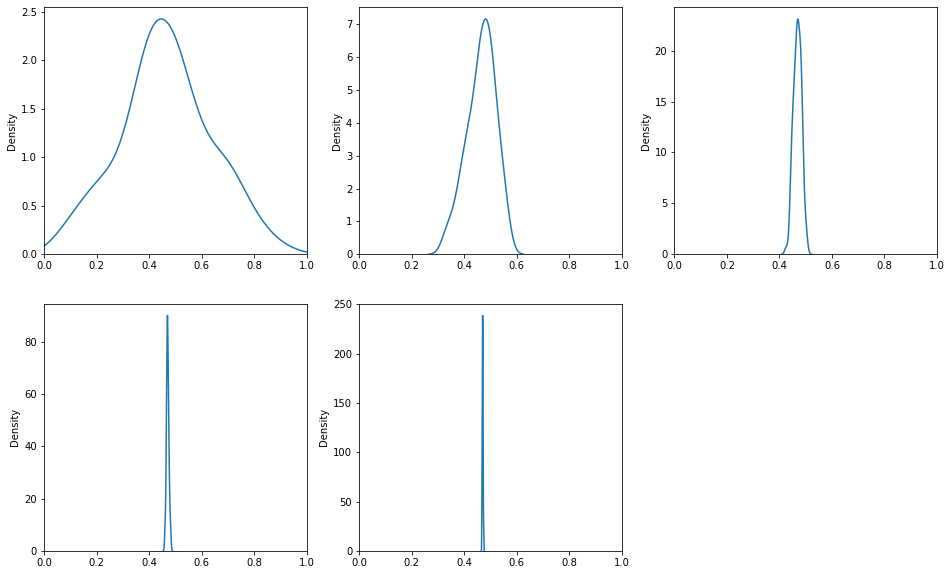

In [288]:
#plotting KDF's
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH6, err6, cdf6, ci6 = getSamples(probp6, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH6).set(xlim=(0,1))
    print("Error:", err6)
thinkplot.Config()

Error: 0.15678010077812812
Error: 0.050338851794612886
Error: 0.016223748025656702
Error: 0.0050185256799183545
Error: 0.0016551302063583997


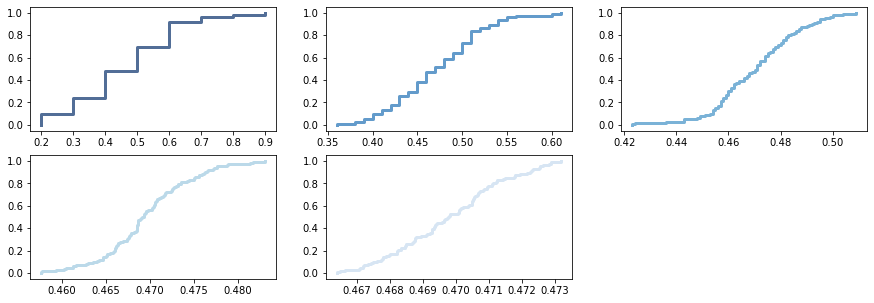

In [289]:
#plotting CDF's
for i in range(countHist):
    tmpH6, err6, cdf6, ci6= getSamples(probp6, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf6)
    print("Error:", err6)
thinkplot.Config()

1.0


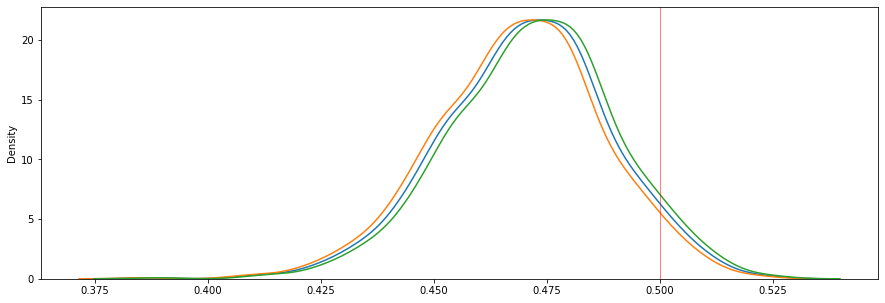

In [290]:
#Run a bunch of trials and count how many purple LOSES in. 
trials = 1000
means6, err8, cdfFin6, ciFin6 = getSamples(probp6, n=700, samples=trials)
lowest6 = means6 - err6
highest6 = means6 + err6
bWins6 = 0 
for i in range(len(means6)):
    if means4[i] > .5000:
        bWins6 = bWins6 + 1
print(bWins6/trials)

sns.kdeplot(means6)
sns.kdeplot(lowest6)
sns.kdeplot(highest6)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple wins is 4.9% 
We are 95 percent confident that purple will get between 43.3% and 50.6% percent of the vote


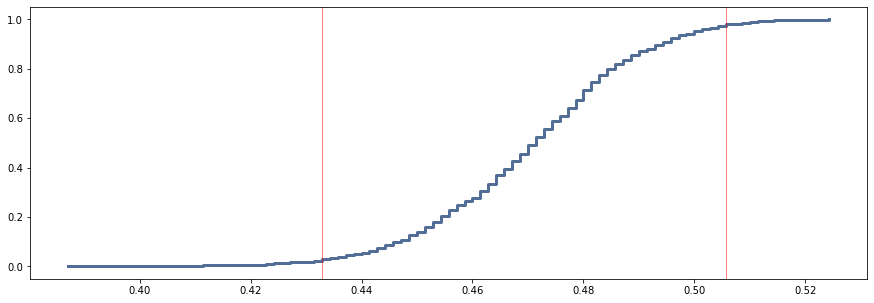

In [291]:
thinkplot.Cdf(cdfFin6)
thinkplot.axvline(ciFin6[0], color="red")
thinkplot.axvline(ciFin6[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin6.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin6[0]*100, ciFin6[1]*100))

Prediction- Combining all 9 polls in district 6 purple party looses.
            Winner is yellow party

                                    District-7

In [292]:
df7=dff.iloc[6]
print("Purple pary vote share in 9 polls in district 7 :",round(df7.mean(),2))

Purple pary vote share in 9 polls in district 7 : 0.53


In [293]:
#How likely is it for someone to vote purple and yellow?
probp7 = .53
print("Purple Prob:", probp7)

proby7 = .47
print("Yellow Prob :", proby7)

Purple Prob: 0.53
Yellow Prob : 0.47


In [294]:
getSamples(probp7, 1000, 5)

([0.531, 0.55, 0.534, 0.544, 0.552],
 0.014812157169028433,
 Cdf([0.531 0.534 0.544 0.55  0.552], [0.2 0.4 0.6 0.8 1. ]),
 (0.531, 0.552))

Error: 0.1543372929657638
Error: 0.050744457825461095
Error: 0.016919515359489476
Error: 0.005382815248547914
Error: 0.001617620165551854


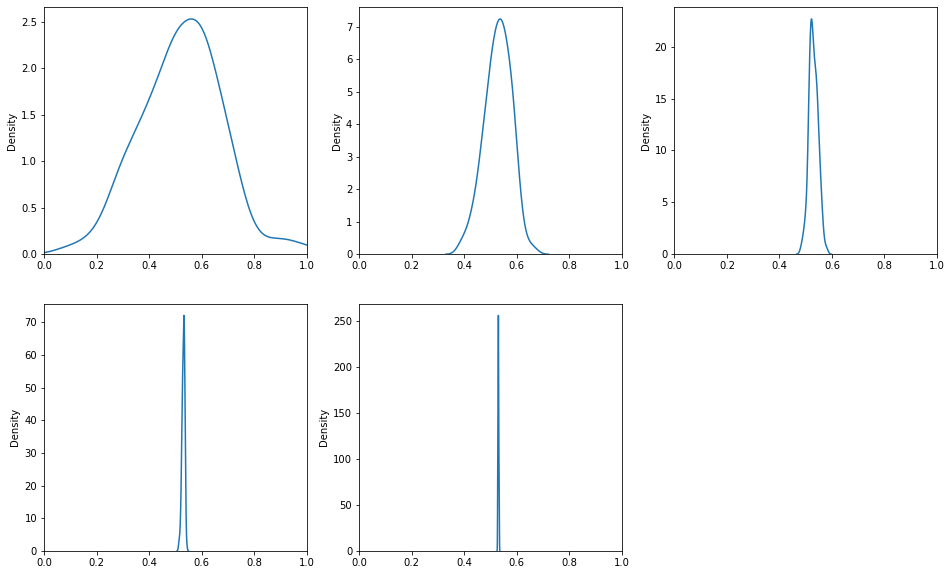

In [295]:
#plotting KDF's:
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH7, err7, cdf7, ci7 = getSamples(probp7, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH7).set(xlim=(0,1))
    print("Error:", err7)
thinkplot.Config()

Error: 0.17256882684888372
Error: 0.051894122981316494
Error: 0.01651817181167457
Error: 0.00538514623756867
Error: 0.0015524622378660252


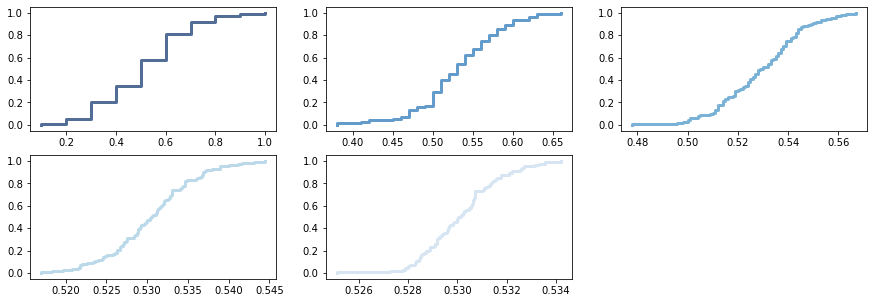

In [296]:
#plotting CDF's
for i in range(countHist):
    tmpH7, err7, cdf7, ci7 = getSamples(probp7, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf7)
    print("Error:", err7)
thinkplot.Config()

0.937


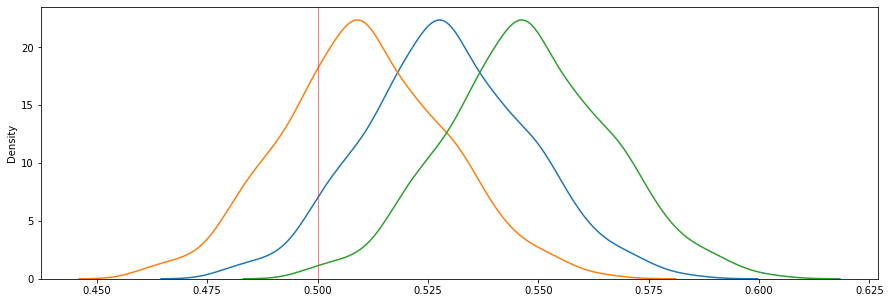

In [297]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means7, err7, cdfFin7, ciFin7 = getSamples(probp7, n=700, samples=trials)
lowest7 = means7 - err7
highest7 = means7 + err7
bWins7 = 0 
for i in range(len(means7)):
    if means7[i] > .5000:
        bWins7 = bWins7 + 1
print(bWins7/trials)

sns.kdeplot(means7)
sns.kdeplot(lowest7)
sns.kdeplot(highest7)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple wins is 93.7% 
We are 95 percent confident that purple will get between 49.3% and 56.7% percent of the vote


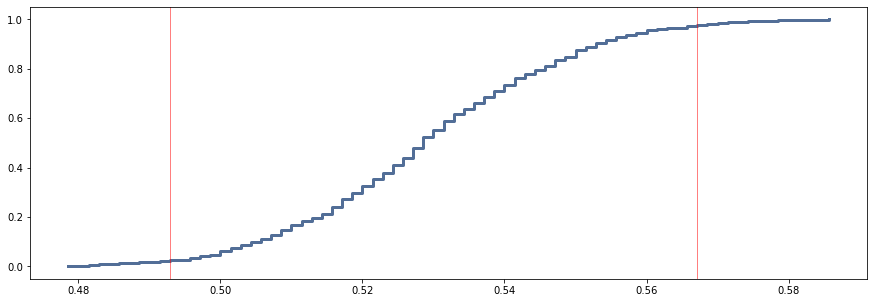

In [298]:
thinkplot.Cdf(cdfFin7)
thinkplot.axvline(ciFin7[0], color="red")
thinkplot.axvline(ciFin7[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin7.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin7[0]*100, ciFin7[1]*100))

Prediction- Combining all 9 polls in district 7 purple party is winner.
           

            District-1- Winner Purple Party(1)

            District-2- Purple party is going to lose(0)

            District-3- Winner Purple Party(1)

            District-4- Winner Purple Party(1)

            District-5- Purple party is going to lose(0)

            District-6- Purple party is going to lose(0)

            District-7- Winner Purple Party(1)

            purple party wins 4/7 district, therefore purple party can be predicted as winner


In [299]:
# calucating total yellow party vote share:

past_vote_table["Yellow_vote_expected"]=past_vote_table["voter_turn_percentage"]+past_vote_table["Yellow_improvement"]
past_vote_table

,voter_turn_percentage,Yellow_improvement,year,Yellow_vote_expected
0,0.53,0.012,2013,0.542
1,0.51,0.023,2014,0.533
2,0.48,-0.017,2015,0.463
3,0.55,0.031,2016,0.581
4,0.54,0.030,2017,0.570
5,0.59,-0.004,2018,0.586
6,0.49,-0.030,2019,0.460
7,0.57,0.042,2020,0.612
8,0.56,0.029,2021,0.589


In [300]:
purple_vote=['.458','.467','.537','.419','.43','.414','.54','.398','.411']
Yellow_vote=['.542','.5333','.463','.581','.57','.586','.46','.612','.589']

### Part 2 - Regression

<b>Use the data provided to try to predict the wage. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [301]:
df = pd.read_csv("players_20_2.csv")
df.dropna()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2000,21,17,40,35,27,24,23,21,28,...,16,46,48,28,25,39,41,45,50,52
18274,2000,24,20,42,43,28,32,24,29,39,...,20,42,49,23,25,37,35,42,53,57
18275,1000,32,33,49,53,32,40,32,32,55,...,26,50,45,38,38,36,39,46,52,46
18276,1000,39,34,47,54,28,42,37,39,48,...,28,57,49,31,48,36,40,39,44,54


In [302]:
df.shape

(18278, 30)

In [303]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [304]:
df=df[df["wage_eur"]<100000]
df=df[df["wage_eur"]>20000]
df=df[df["movement_reactions"]>30]
df=df[df["mentality_composure"]>50]
df=df[df["mentality_vision"]>50]
df=df[df["attacking_short_passing"]>60]




In [305]:
df.shape

(1578, 30)

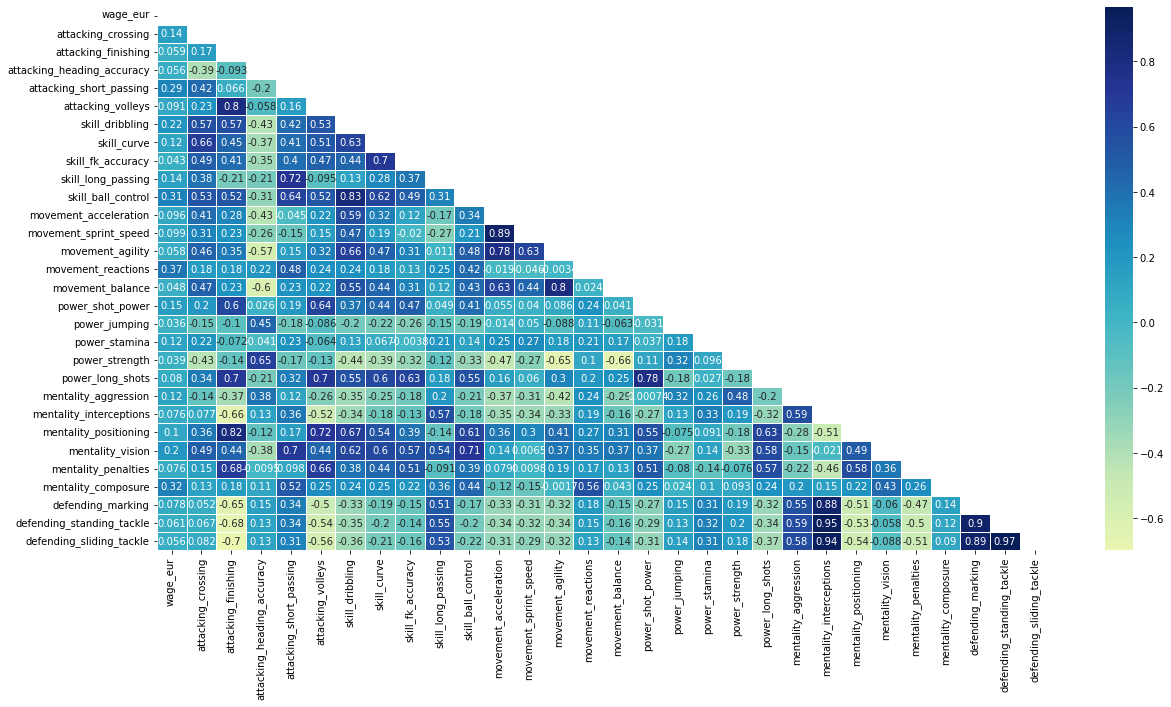

In [306]:
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

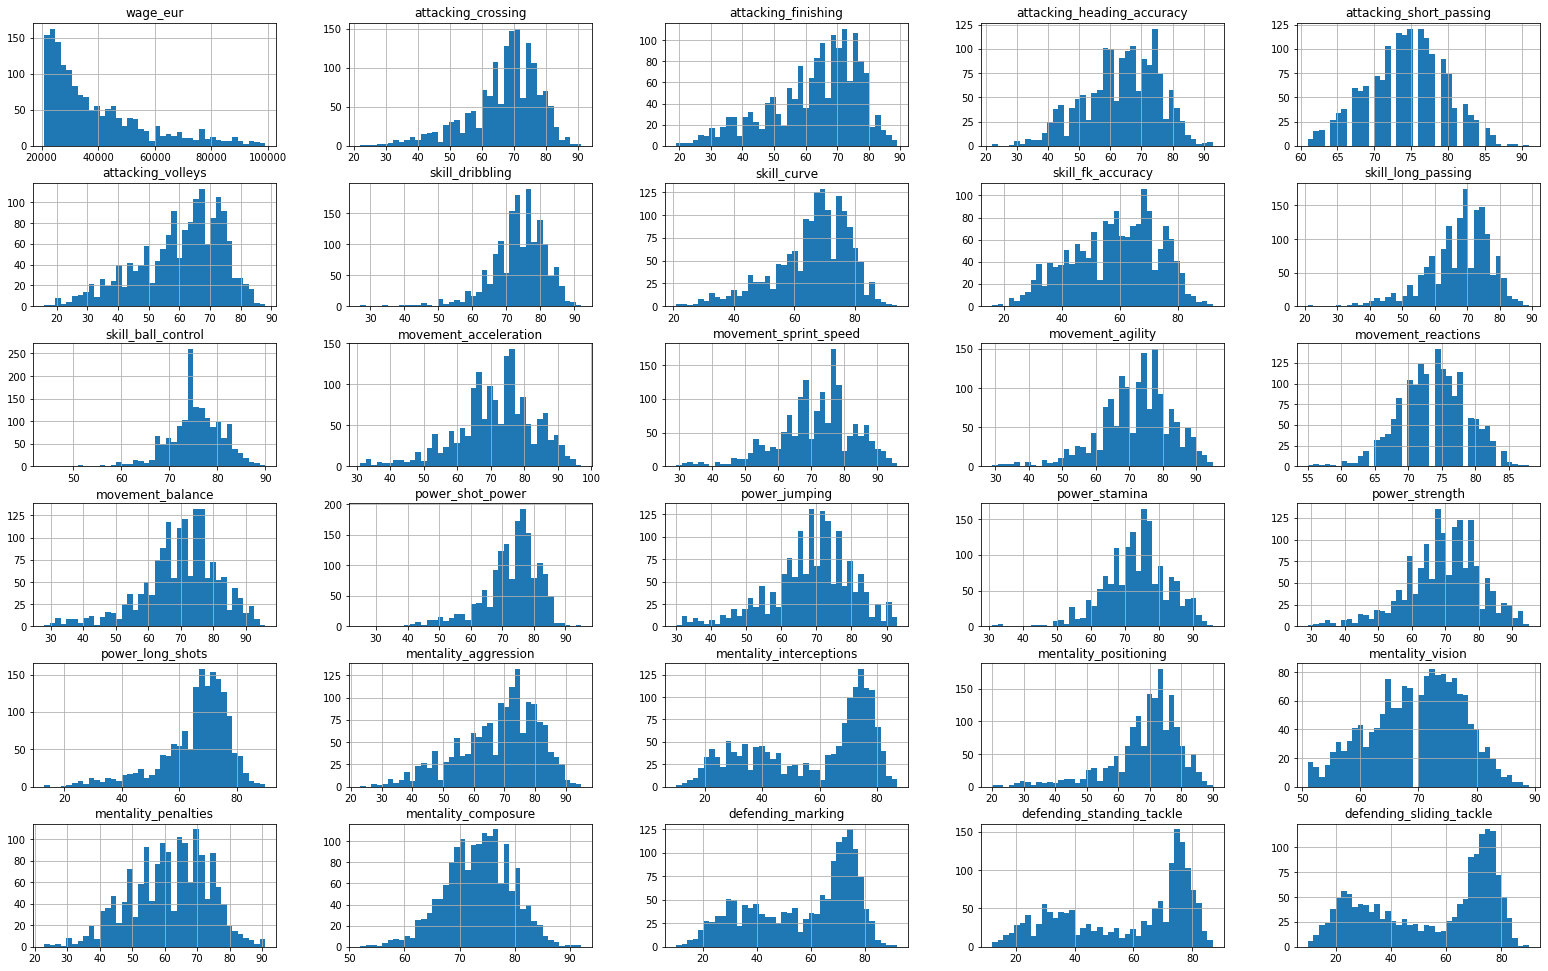

In [307]:
#pollting histogram
df.hist(bins=40, figsize=(27,17))
plt.show()

Values 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing' have high 
correlation with the wages therfore  choosing these as x values

                        POLYNOMIAL REGRESSION

In [308]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [309]:
# seperate out our x and y values
x_values = df[[ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing' ]].values
y_values = df['wage_eur'].values

# visual
print(x_values[0], y_values[0])

[83 81 57 73] 89000


In [310]:
x_values

array([[83, 81, 57, 73],
       [78, 85, 86, 91],
       [83, 82, 63, 76],
       ...,
       [56, 57, 61, 63],
       [59, 58, 55, 64],
       [62, 68, 70, 69]], dtype=int64)

In [311]:
degree=2


poly_model = PolynomialFeatures(degree=degree)


poly_x_values = poly_model.fit_transform(x_values)


print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

initial values [83 81 57 73]
Mapped to [1.000e+00 8.300e+01 8.100e+01 5.700e+01 7.300e+01 6.889e+03 6.723e+03
 4.731e+03 6.059e+03 6.561e+03 4.617e+03 5.913e+03 3.249e+03 4.161e+03
 5.329e+03]


In [312]:
poly_model.fit(poly_x_values, y_values)


regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)

16137.949477897142

In [313]:
y = np.array(df["wage_eur"]).reshape(-1,1)
y.shape

(1578, 1)

In [314]:
#Get a new df with only the features we'll use
df_ = df.drop(columns={"wage_eur"})


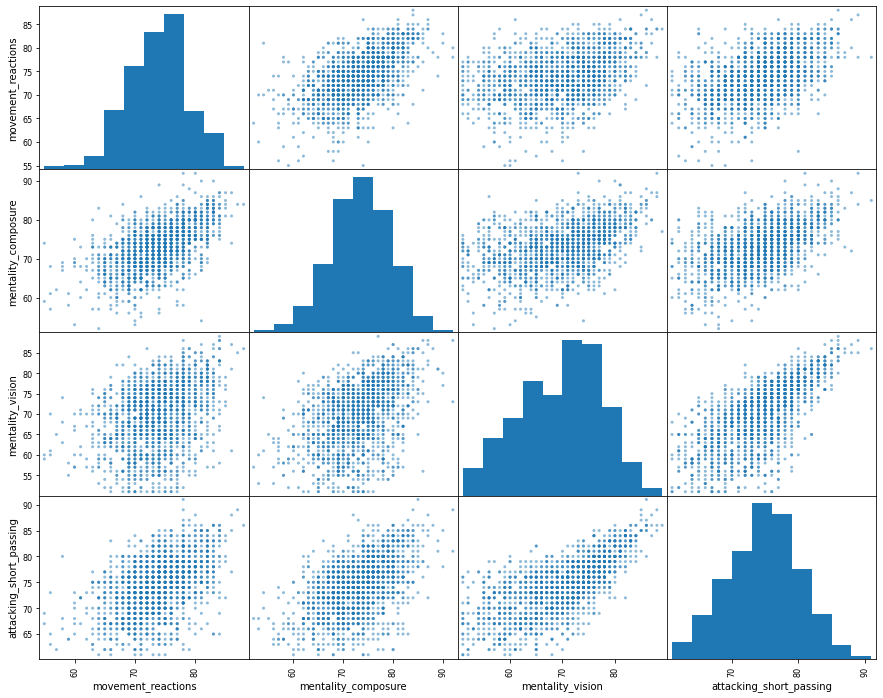

In [315]:
#plotting the scatter plot for Independent variables:
from pandas.plotting import scatter_matrix
attributes = [ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing']
scatter_matrix(df_[attributes], figsize=(15,12))
plt.show()

We expected this as all the above are showing high collinearity

In [316]:
df_ = df_[[ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing']]

In [317]:
x = np.array(df_)
x.shape

(1578, 4)

In [318]:
#Split data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

In [319]:
#Generate model 
model = LinearRegression().fit(xTrain,yTrain)

In [320]:
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.10422066493165882


In [321]:
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

Intercept: -87130.19911639745
Coefs: [829.56770554 446.49451777 -55.05455829 495.02096936]


In [322]:
#Setup
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

In [323]:
#Get RMSE
tmp = model.predict(xTest)
R_mse=mean_squared_error(tmp, yTest, squared=False)
r_sqr=model.score(xTest,yTest)
print("RMSE:", R_mse)
print('R-squared:', r_sqr)

RMSE: 16517.47210833544
R-squared: 0.10422066493165882


In [324]:
y_pred=model.predict(xTest)

PREDICTIONS

In [325]:
y_pred

array([[51648.3720911 ],
       [39322.50584289],
       [27294.94046851],
       [28721.34348947],
       [36320.75160489],
       [40551.5747107 ],
       [40570.14691914],
       [35007.85053363],
       [40635.12241725],
       [42549.40424323],
       [38070.88186768],
       [38564.42067013],
       [42411.72160496],
       [33539.03004171],
       [42149.59751203],
       [43360.75623843],
       [40558.57287264],
       [35871.59186877],
       [42893.32986281],
       [35266.2762245 ],
       [42561.9904014 ],
       [32088.89531538],
       [29491.09519384],
       [45224.69401986],
       [33465.87333022],
       [36393.17424815],
       [37426.96071165],
       [29827.19609813],
       [46182.00293994],
       [47810.45003966],
       [50888.39732416],
       [48252.32711693],
       [29599.90770184],
       [29946.49853976],
       [35037.87677796],
       [56283.6913698 ],
       [31403.61035601],
       [43663.98012171],
       [39127.08235594],
       [31922.90508717],


In [326]:
yTest

array([[89000],
       [39000],
       [55000],
       [46000],
       [37000],
       [30000],
       [23000],
       [27000],
       [32000],
       [65000],
       [40000],
       [27000],
       [21000],
       [24000],
       [49000],
       [30000],
       [24000],
       [23000],
       [37000],
       [24000],
       [53000],
       [51000],
       [39000],
       [77000],
       [55000],
       [32000],
       [52000],
       [21000],
       [59000],
       [35000],
       [89000],
       [87000],
       [24000],
       [39000],
       [29000],
       [94000],
       [23000],
       [34000],
       [30000],
       [47000],
       [27000],
       [66000],
       [42000],
       [24000],
       [29000],
       [26000],
       [60000],
       [46000],
       [69000],
       [27000],
       [30000],
       [40000],
       [50000],
       [47000],
       [31000],
       [42000],
       [40000],
       [24000],
       [35000],
       [31000],
       [32000],
       [21000],
       [

                    LINEAR REGRESSION AND MULTIPLE REGRESSION

In [327]:

w = "wage_eur"
c = "movement_reactions"
hw = df[['wage_eur', "movement_reactions"]]
hw = hw.dropna(axis=0)
hw = hw.dropna(axis=1)

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

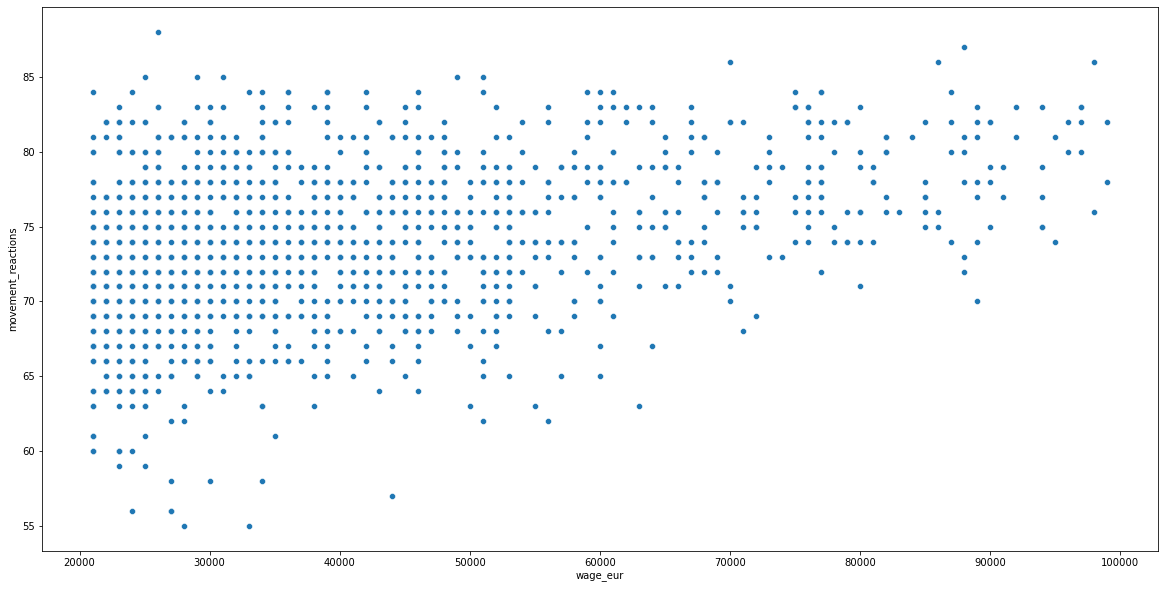

In [328]:
sns.scatterplot(data=hw, x=hw[w], y=hw[c])

In [329]:
#Deal with data
#ensure that the inputs and outputs are the right shape.
#The -1 means basically "make it one column" in this use. 
x = np.array(hw[w]).reshape(-1,1)
y = np.array(hw[c]).reshape(-1,1)
x.shape, y.shape

((1578, 1), (1578, 1))

In [330]:
#Do regression
inter, slope = thinkstats2.LeastSquares(hw[w], hw[c]) # Calculate model
res = thinkstats2.Residuals(hw[w], hw[c], inter, slope) # Make residual list. Used later, not needed now. 
regLine = thinkstats2.FitLine(hw[w], inter, slope) # Generate line for plotting. 
print("Y intercept:", inter)
print("Slope:", slope)


Y intercept: 69.63564335064399
Slope: 0.00010454436155874518


In [331]:
print(" Prediction:")
# slope*a+inter, where a is the independent varable

 Prediction:


                            MULTIPLE REGRESSION

In [332]:
y = np.array(df["wage_eur"]).reshape(-1,1)
y.shape

(1578, 1)

In [333]:
#Get a new df with only the features we'll use
df_ = df.drop(columns={"wage_eur"})


In [334]:
x = np.array(df_)
x.shape

(1578, 29)

In [335]:
#Split data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

In [336]:
#Generate model 
model = LinearRegression().fit(xTrain,yTrain)

In [337]:
#generate Model
model = LinearRegression().fit(x, y) 

In [338]:
#Get the results of generating the model

#Note: some results come wrapped in an array, that's what the [0]s are for. Remove them to see the true return. 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)

print('Coefficient of determination (more on this later):', r_sq)
#Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 

Coefficient of determination (more on this later): 0.23385684431814302
Intercept: -127371.12154167885
Slope: 44.09923385017453


In [339]:
#Get some info on our new regression model
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.2277500652552903


In [340]:
#Get RMSE
tmp = model.predict(xTest)
mean_squared_error(tmp, yTest, squared=False)

15929.874782843153

In [341]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1 = pd.DataFrame(yTest, columns={"Y values"})
tmp2 = pd.DataFrame(tmp, columns={"Predictions"})
tmp3 = pd.DataFrame((yTest-tmp), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.head()

,Y values,Predictions,Residual
0,87000,52982.568775,34017.431225
1,21000,28092.523290,-7092.523290
2,27000,44889.124842,-17889.124842
3,36000,27648.304487,8351.695513
4,41000,43620.488765,-2620.488765


In [342]:
#Statsmodels.
import statsmodels.api as sm

In [343]:
#Fit the model. 
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     11.89
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           2.42e-47
Time:                        14:44:11   Log-Likelihood:                -12214.
No. Observations:                1104   AIC:                         2.449e+04
Df Residuals:                    1074   BIC:                         2.464e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.255e+05   1.16e+04    -10.795      0.0

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

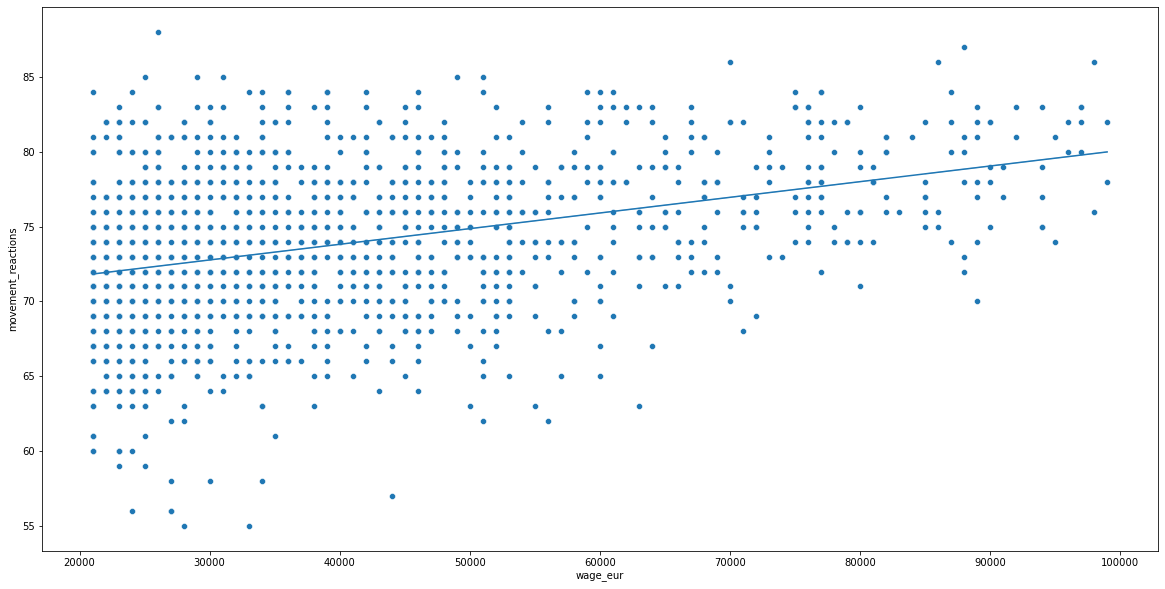

In [348]:
#Graph it.
#The fitline above calculates the line for us. For an exercise, try to implement a copy of that...
sns.scatterplot(x=hw[w], y=hw[c])
sns.lineplot(x=regLine[0], y=regLine[1])